# Tugas *Data Mining*
### Klasifikasi Data : *Decision Tree, Naive Bayes,* dan *SVM*
*Heart Disease Dataset*

**Oleh :**
    
    Dellani Rahmawati              (06211740000016)
    Dea Restika Augustina Pratiwi  (06211740000023)
##### Sumber : [Kaggle](https://www.kaggle.com/johnsmith88/heart-disease-dataset)

### Impor *Library*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

### Data

In [2]:
data = pd.read_excel("D:/Semester 6/Data Mining/Tugas Klasifikasi/heart.xlsx")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### <center>A. *PREPROCESSING*</center>

### 1. Merubah Nama dan Tipe Variabel
Agar variabel terdeteksi sesuai dengan tipenya, maka dilakukan perubahan tipe variabel. Selain itu, nama variabel diubah dengan nama yang lebih detail.

In [3]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 
                'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope',
                'num_major_vessels', 'thalassemia', 'target']

In [10]:
data.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

Tipe data beberapa variabel masih tidak tepat, seperti sex, cp, dan sebagainya seharusnya merupakan tipe kategorik (objek)

In [45]:
data['sex'] = data['sex'].astype('object')
data['chest_pain_type'] = data['chest_pain_type'].astype('object')
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].astype('object')
data['rest_ecg'] = data['rest_ecg'].astype('object')
data['exercise_induced_angina'] = data['exercise_induced_angina'].astype('object')
data['st_slope'] = data['st_slope'].astype('object')
data['thalassemia'] = data['thalassemia'].astype('object')
data['target'] = data['target'].astype('object')

### 2. Deteksi *Missing Value*

In [21]:
np.sum(data.isnull())

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

Tidak ada variabel yang memiliki *missing value* pada data ini

### 3. Deteksi *Outlier*
Deteksi *outlier* akan dilakukan dengan menggunakan *boxplot* pada data bertipe numerik

In [13]:
data.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                      object
dtype: object

Terdapat 6 variabel bertipe numerik. Sehingga deteksi outlier dilakukan pada 6 variabel tersebut

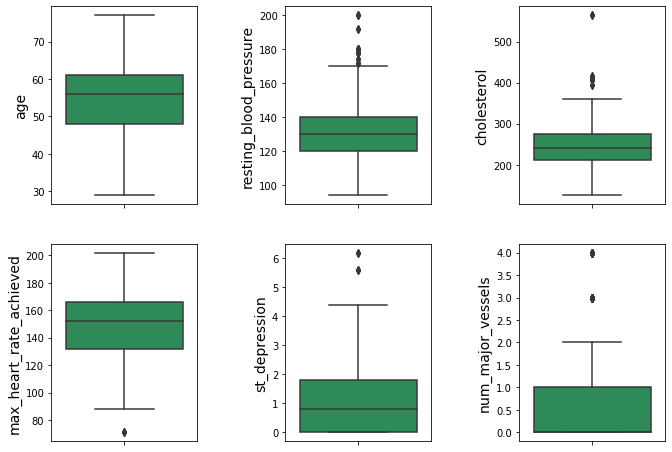

In [23]:
plt.figure(figsize = (11,8))
plt.subplot(231)
sns.boxplot(x = data['age'], saturation = 1, width = 0.8, color = 'seagreen', orient = 'v')
plt.ylabel('age', fontsize = 14)
plt.subplots_adjust(wspace = 0.6)
plt.subplot(232)
sns.boxplot(x = data['resting_blood_pressure'], saturation = 1, width = 0.8, color = 'seagreen', orient = 'v')
plt.ylabel('resting_blood_pressure', fontsize = 14)
plt.subplot(233)
sns.boxplot(x = data['cholesterol'], saturation = 1, width = 0.8, color = 'seagreen', orient = 'v')
plt.ylabel('cholesterol', fontsize = 14)
plt.subplot(234)
sns.boxplot(x = data['max_heart_rate_achieved'], saturation = 1, width = 0.8, color = 'seagreen', orient = 'v')
plt.ylabel('max_heart_rate_achieved', fontsize = 14)
plt.subplot(235)
sns.boxplot(x = data['st_depression'], saturation = 1, width = 0.8, color = 'seagreen', orient = 'v')
plt.ylabel('st_depression', fontsize = 14)
plt.subplot(236)
sns.boxplot(x = data['num_major_vessels'], saturation = 1, width = 0.8, color = 'seagreen', orient = 'v')
plt.ylabel('num_major_vessels', fontsize = 14)
plt.show()

### 4. Transformasi Data

Transformasi data dibutuhkan pada saat klasifikasi, namun untuk visualisasi masih diperlukan data yang tidak ditransformasi,
sehingga dibuat varibel baru yaitu dataset yang berisikan data yang telah dilakukan tranformasi. **Transformasi dilakukan setelah ada variabel dummy di bawah**

### <center>B. *Summary Statistics*</center>

In [9]:
list = ['sex','chest_pain_type','fasting_blood_sugar','rest_ecg','exercise_induced_angina','st_slope','target','thalassemia']
num = data.drop(list,axis = 1 )
num.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.754146
std,9.072290,17.516718,51.59251,23.005724,1.175053,1.030798
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,0.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,4.000000


### <center>C. Visualisasi Data</center>

### Jumlah yang Terkena Penyakit Jantung dan Tidak

([<matplotlib.axis.XTick at 0x21d025d0548>,
 <a list of 2 Text xticklabel objects>)

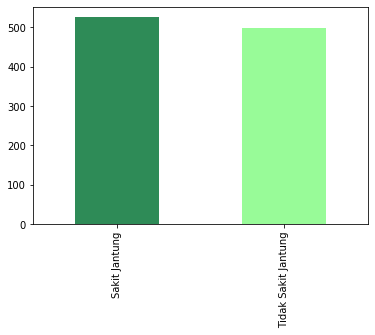

In [24]:
data.target.value_counts().plot(kind="bar", color=["seagreen", "palegreen"])
x = np.arange(2)
plt.xticks(x, ('Sakit Jantung', 'Tidak Sakit Jantung'))

Berdasarkan plot di atas, terdapat 526 pasien terkena penyakit jantung, sementara 499 lainnya tidak terkena penyakit jantung. Variabel ini yang akan dijadikan kelas yang akan prediksi dalam klasifikasi. Kedua kategori mempunya frekuensi yang tidak berbeda jauh atau selisihnya kecil. Sehingga, dalam klasifikasi digunakan akurasi saja sudah cukup untuk mengukur kebaikan dari metode klasifikasi

### Korelasi Antar Variabel

#### 1. Heatmap

(6.0, 0.0)

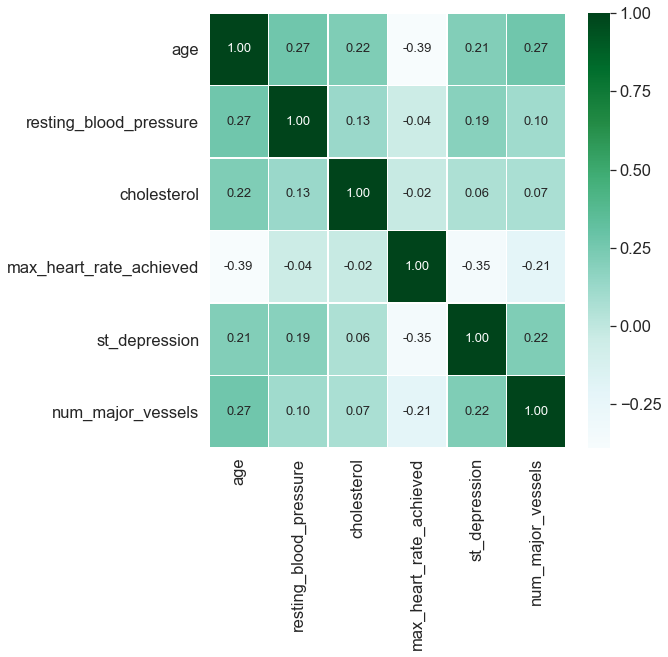

In [52]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="BuGn",
                 annot_kws={"size": 13});
bottom, top = ax.get_ylim()
sns.set(font_scale=2)
ax.set_ylim(bottom + 0.5, top - 0.5)

Heatmap di atas menunjukkan besarnya korelasi Pearson. Korelasi Pearson hanya dapat digunakan pada data numerik. Ini merupakan salah satu manfaat dari perubahan type variabel yang sesuai. Jika tipe variabel tidak dirubah, maka data kategori seperti jenis kelamin (sex), thalassemia, dsb akan ikut dihitung korelasi pearsonnya.

#### 2. *Pair Plot*

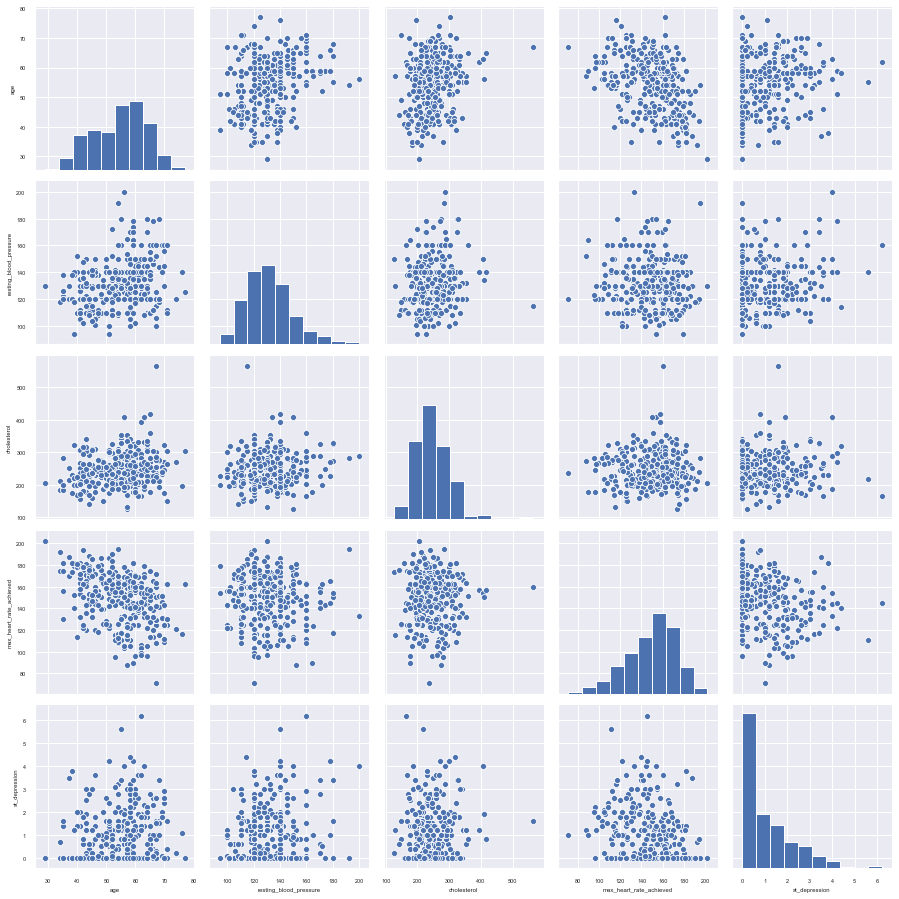

In [62]:
# Tidak jadi dipakai
num_var = ['age','resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']
sns.pairplot(data[num_var], kind='scatter', diag_kind='hist',palette = "seagreen")
sns.set(font_scale=0.5)
plt.show()

### Korelasi Masing-Masing Variabel dengan Target

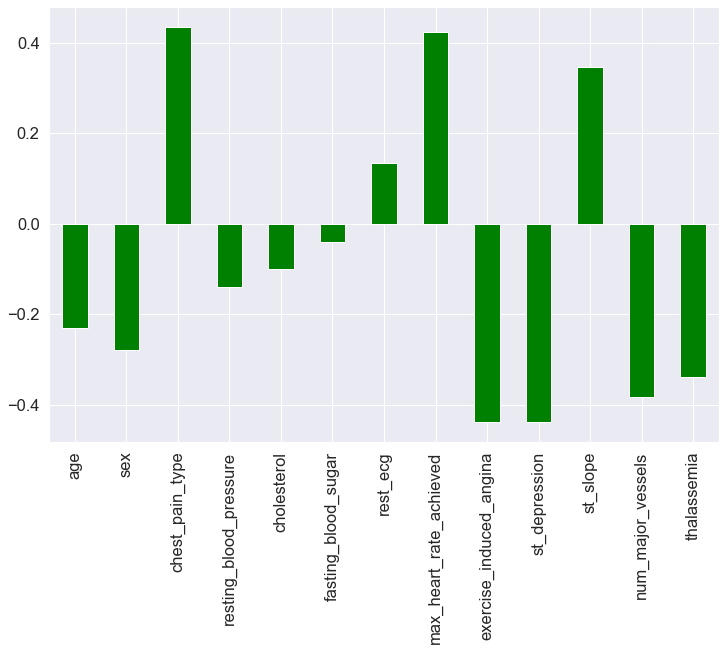

In [67]:
df = pd.read_excel("D:/Semester 6/Data Mining/Tugas Klasifikasi/heart.xlsx")
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 
                'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope',
                'num_major_vessels', 'thalassemia', 'target']
sns.set(font_scale=1.5)
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', color = 'green', grid=True, figsize=(12, 8))

### Perbandingan Jumlah Orang Yang Terkena Penyakit Jantung dan Tidak Berdasarkan Variabel Kategori

In [4]:
categorical_val = []
continous_val = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex : [1 0]
chest_pain_type : [0 1 2 3]
resting_blood_pressure : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
cholesterol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 

In [20]:
categorical_val

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'rest_ecg',
 'exercise_induced_angina',
 'st_slope',
 'num_major_vessels',
 'thalassemia',
 'target']

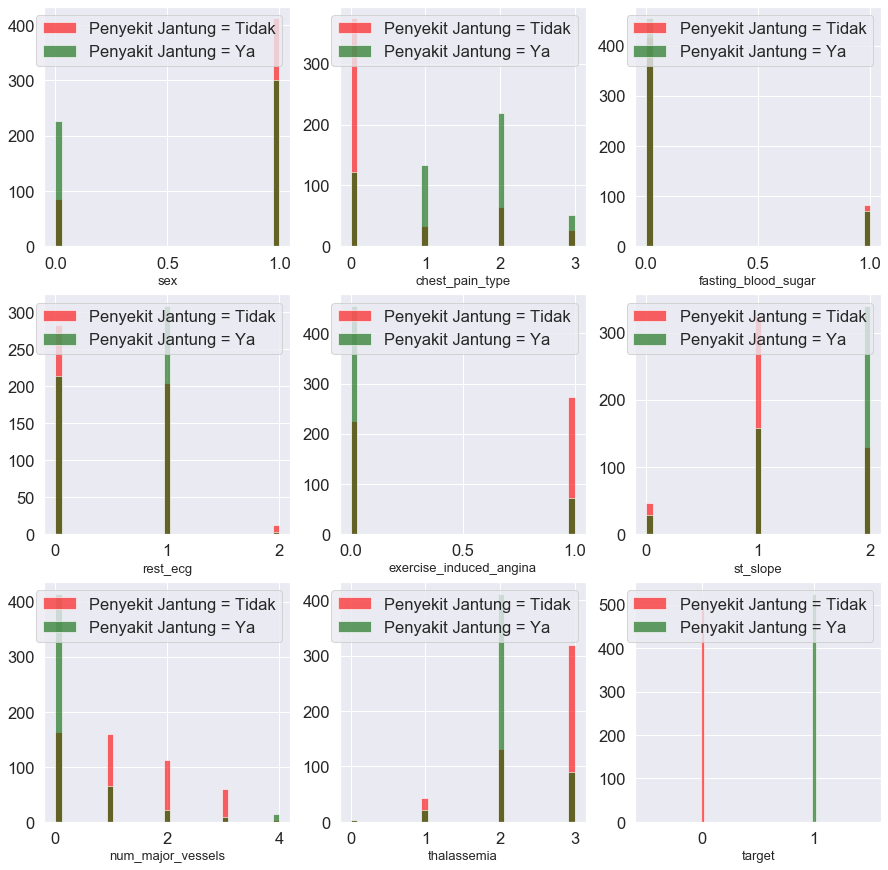

In [72]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='red', label='Penyekit Jantung = Tidak', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='darkgreen', label='Penyakit Jantung = Ya', alpha=0.6)
    plt.legend()
    plt.xlabel(column, fontsize = 13)

### Perbandingan Jumlah Orang Yang Terkena Penyakit Jantung dan Tidak Berdasarkan Variabel Numerik

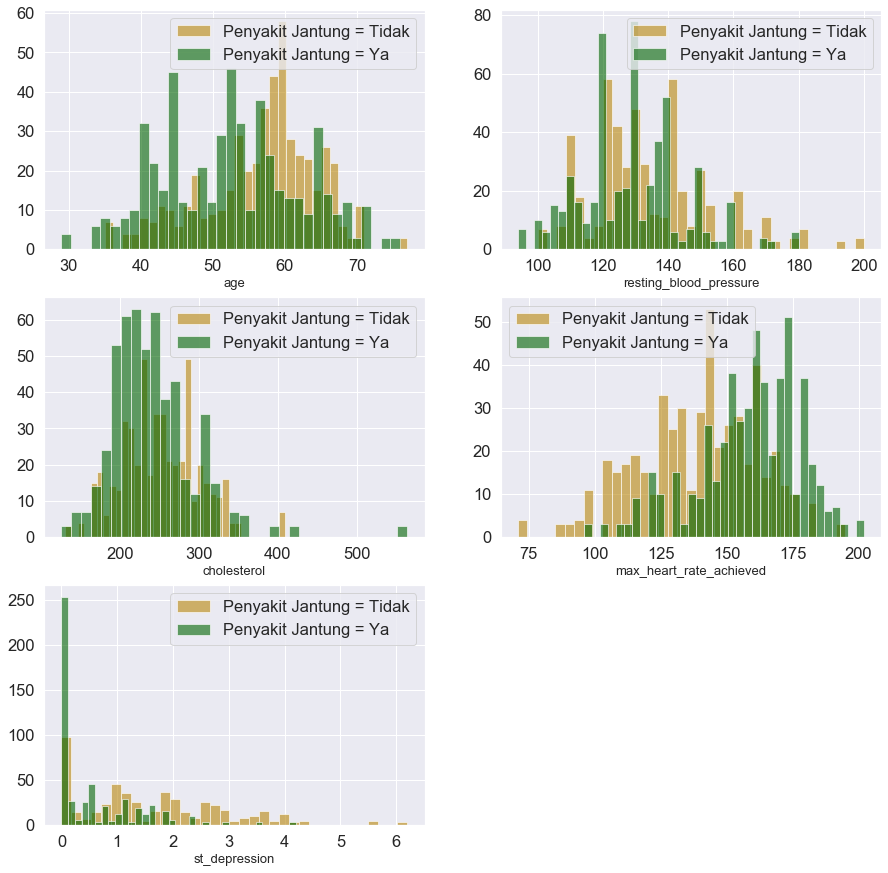

In [74]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='darkgoldenrod', label='Penyakit Jantung = Tidak', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='darkgreen', label='Penyakit Jantung = Ya', alpha=0.6)
    plt.legend()
    plt.xlabel(column, fontsize = 13)

### <center>D. Klasifikasi</center>

### Variabel Dummy

In [83]:
categorical_val.remove('target')
dataset = pd.get_dummies(data, columns = categorical_val)
dataset

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,target,sex_0,sex_1,chest_pain_type_0,chest_pain_type_1,...,st_slope_2,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,num_major_vessels_4,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
1021,60,125,258,141,2.8,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1022,47,110,275,118,1.0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1023,50,110,254,159,0.0,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [84]:
# Run Variabel Dummy
s_sc = StandardScaler()
col_to_scale = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])
dataset.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,target,sex_0,sex_1,chest_pain_type_0,chest_pain_type_1,...,st_slope_2,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,num_major_vessels_4,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [8]:
print(data.columns)
print(dataset.columns)

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')
Index(['age', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'target', 'sex_0', 'sex_1',
       'chest_pain_type_0', 'chest_pain_type_1', 'chest_pain_type_2',
       'chest_pain_type_3', 'fasting_blood_sugar_0', 'fasting_blood_sugar_1',
       'rest_ecg_0', 'rest_ecg_1', 'rest_ecg_2', 'exercise_induced_angina_0',
       'exercise_induced_angina_1', 'st_slope_0', 'st_slope_1', 'st_slope_2',
       'num_major_vessels_0', 'num_major_vessels_1', 'num_major_vessels_2',
       'num_major_vessels_3', 'num_major_vessels_4', 'thalassemia_0',
       'thalassemia_1', 'thalassemia_2', 'thalassemia_3'],
      dtype='object')


In [85]:
categorical_val = []
continous_val = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex : [1 0]
chest_pain_type : [0 1 2 3]
resting_blood_pressure : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
cholesterol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 

In [10]:
categorical_val

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'rest_ecg',
 'exercise_induced_angina',
 'st_slope',
 'num_major_vessels',
 'thalassemia',
 'target']

In [86]:
categorical_val.remove('target')
dataset = pd.get_dummies(data, columns = categorical_val)
dataset.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,target,sex_0,sex_1,chest_pain_type_0,chest_pain_type_1,...,st_slope_2,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,num_major_vessels_4,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


### Data Training & Testing dengan Machine Learning

In [87]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### Cross Validation

In [88]:
X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1. *Support Vector Machine*

#### *Parameter Tunning*

In [89]:
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_grid = GridSearchCV(svm_model, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_grid

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.1,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1),
                         'kernel': ('linear', 'poly', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
svm_grid.fit(X_train, y_train) ## Maaf mas ke run lagi dan lama.

Fitting 5 folds for each of 147 candidates, totalling 735 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [17]:
svm_grid.best_estimator_

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Akurasi

In [18]:
svm_model = SVC(C=2, gamma=0.5, kernel='rbf')
svm_model.fit(X_train, y_train)

print_score(svm_model, X_train, y_train, X_test, y_test, train=True)
print_score(svm_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 98.05%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 95.97%
			F1 score: 97.95%
_______________________________________________
Confusion Matrix: 
 [[159   0]
 [  6 143]]



In [19]:
test_score = accuracy_score(y_test, svm_model.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_model.predict(X_train)) * 100
tuning_results_data = pd.DataFrame(data=[["Tuned SVM", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_data

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned SVM,100.0,98.051948


#### *Heatmap Confusion Matrix*

(2.0, 0.0)

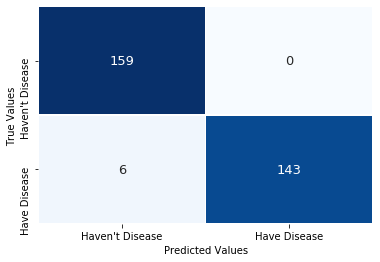

In [60]:
pred = svm_model.predict(X_test)
sv_cm=confusion_matrix(y_test, pred)
ax = sns.heatmap(sv_cm,annot=True,cmap="Blues",fmt="d",cbar=False, linewidths=0.5,
                 xticklabels=["Haven't Disease", "Have Disease"], 
                 yticklabels=["Haven't Disease", "Have Disease"],
                 annot_kws={"size": 13});
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### 2. *Decision Tree*

#### *Parameter Tunning*

In [22]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(tree, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)

In [23]:
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 4484 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 11484 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   56.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid=True, n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
     

In [24]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='random')

#### Akurasi

In [25]:
tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=10,
                              min_samples_leaf=1, 
                              min_samples_split=2, 
                              splitter='random')
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 99.03%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 97.99%
			F1 score: 98.98%
_______________________________________________
Confusion Matrix: 
 [[159   0]
 [  3 146]]



In [26]:
test_score = accuracy_score(y_test, tree.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree.predict(X_train)) * 100

results_data_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_data = tuning_results_data.append(results_data_2, ignore_index=True)
tuning_results_data

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned SVM,100.0,98.051948
1,Tuned Decision Tree Classifier,100.0,99.025974


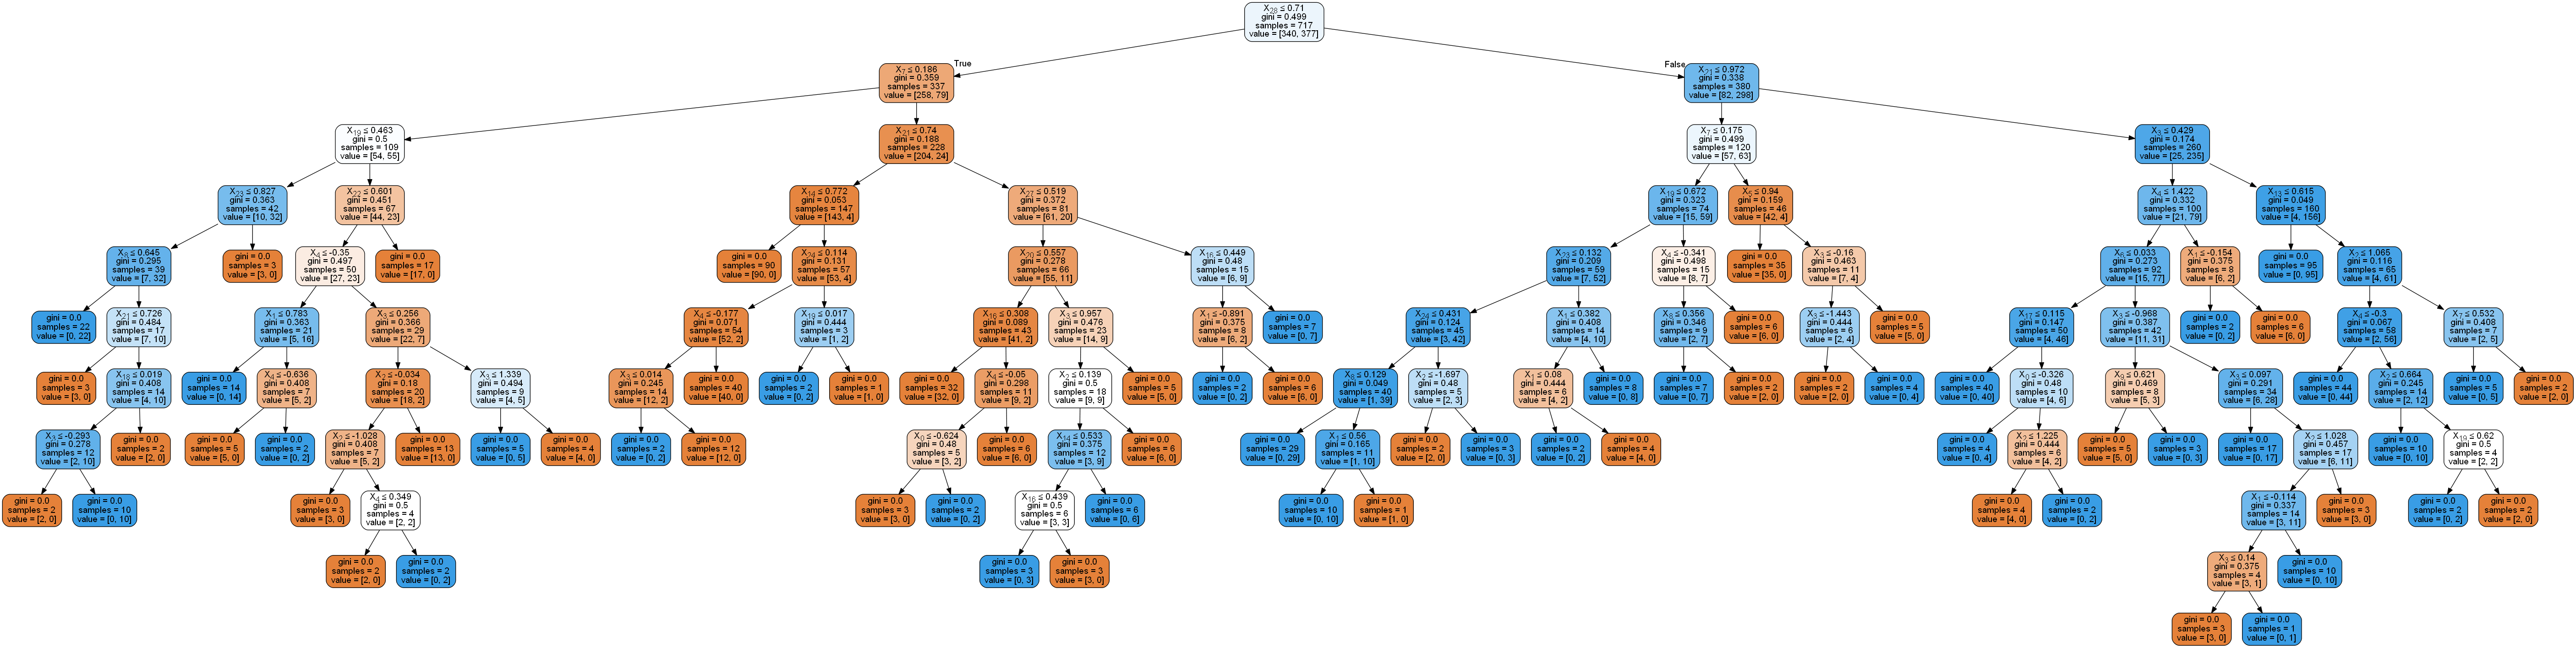

In [45]:
dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### *Heatmap Confusion Matrix*

(2.0, 0.0)

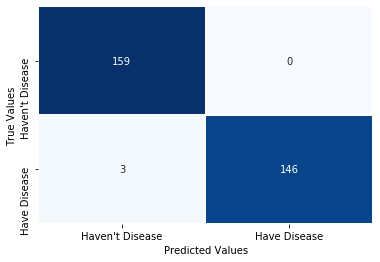

In [37]:
pred = tree.predict(X_test)
tr_cm=confusion_matrix(y_test, pred)
ax = sns.heatmap(tr_cm,annot=True,cmap="Blues",fmt="d",cbar=False, linewidths=0.5,
                 xticklabels=["Haven't Disease", "Have Disease"], 
                 yticklabels=["Haven't Disease", "Have Disease"]);
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### 3. *Naive Bayes*

#### Akurasi

In [38]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
## Akurasi Training
nb.score(X_train, y_train)

0.8214783821478382

In [40]:
## Akurasi Testing
nb.score(X_test, y_test)

0.7792207792207793

#### *Heatmap Training*

(2.0, 0.0)

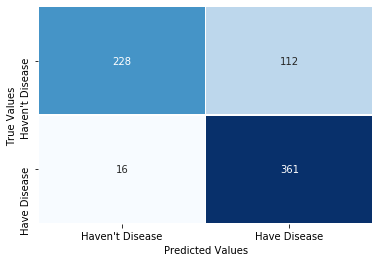

In [42]:
pred = nb.predict(X_train)
nb_cm=confusion_matrix(y_train, pred)
ax = sns.heatmap(nb_cm,annot=True,cmap="Blues",fmt="d",cbar=False, linewidths=0.5,
                 xticklabels=["Haven't Disease", "Have Disease"], 
                 yticklabels=["Haven't Disease", "Have Disease"]);
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### *Heatmap Testing*

(2.0, 0.0)

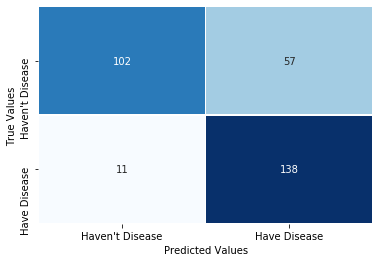

In [41]:
pred = nb.predict(X_test)
nb_cm=confusion_matrix(y_test, pred)
ax = sns.heatmap(nb_cm,annot=True,cmap="Blues",fmt="d",cbar=False, linewidths=0.5,
                 xticklabels=["Haven't Disease", "Have Disease"], 
                 yticklabels=["Haven't Disease", "Have Disease"]);
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)